In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import datetime
warnings.filterwarnings('ignore')

In [365]:
df_test = pd.read_csv('/content/fraudTest.csv')
df_train = pd.read_csv('/content/fraudTrain.csv')

In [366]:
df_complete = pd.concat([df_train, df_test])
len(df_complete)

1852394

In [367]:
df_complete.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Data Understanding and Exploration

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud'>

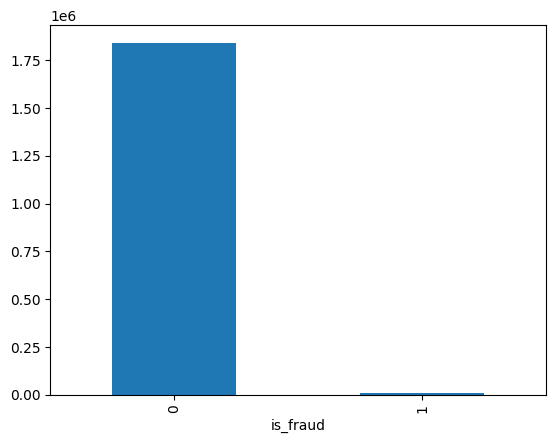

In [369]:
df_complete.groupby('is_fraud').count()['cc_num'].plot(kind='bar')

In [370]:
fraud = df_complete[df_complete['is_fraud'] == 1]
non_fraud = df_complete[df_complete['is_fraud'] == 0]

print(len(fraud))
print(len(non_fraud))

9651
1842743


In [371]:
df_complete.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [372]:
df_complete.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [373]:
df_complete.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [374]:
df_complete.duplicated().sum()

0

<Axes: >

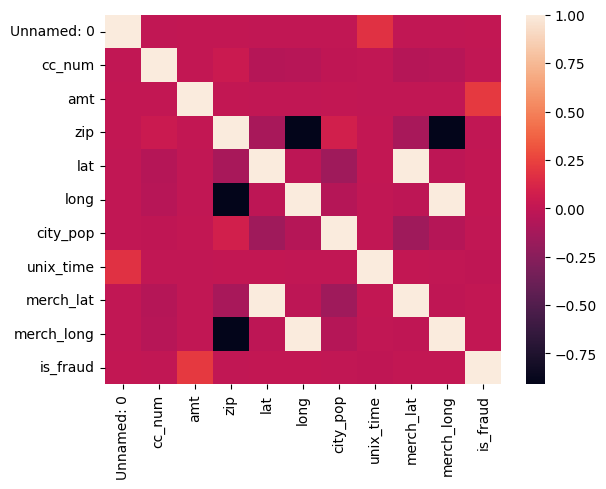

In [375]:
sns.heatmap(df_complete[[i for i in df_complete.columns\
                         if df_complete[i].dtype == 'int64' \
                            or df_complete[i].dtype == 'float64']]\
                            .corr())

## Data Preparation

In [376]:
#Balancing the data
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state=42)])

In [377]:
df_balanced.shape

(19302, 23)

<Axes: xlabel='is_fraud'>

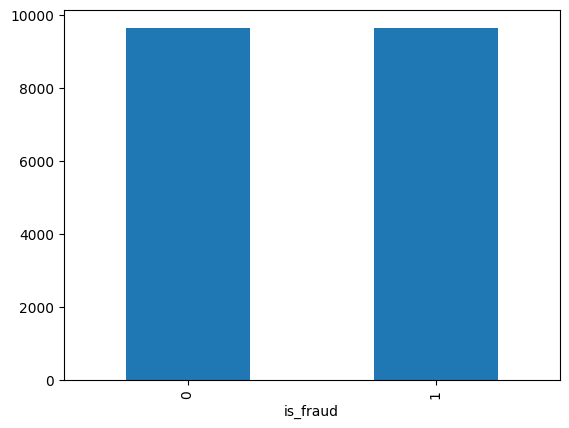

In [378]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot(kind='bar')

In [379]:
columns_dropped= [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'last',
    'gender',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'merch_long',
    'job',
    'zip',
]

df_balanced.drop(columns_dropped, axis=1, inplace=True)

In [380]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   city                   19302 non-null  object 
 4   state                  19302 non-null  object 
 5   lat                    19302 non-null  float64
 6   long                   19302 non-null  float64
 7   city_pop               19302 non-null  int64  
 8   dob                    19302 non-null  object 
 9   is_fraud               19302 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


## Feature Engineering

In [381]:
import pandas as pd

# Convert 'trans_date_trans_time' column to datetime objects
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
#Convert dob into column datetime
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])


In [382]:
#Now, we can use these datetime variables to extract relavant information
#Transition the client, such as day and age
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [383]:
df_balanced = df_balanced.rename(columns={'trans_date_trans_time': 'hour_transaction'})

In [384]:
# Function to get time of day
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'Morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'Afternoon'
    elif hour ['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'Night'
    return ans


In [385]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [386]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,Night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,Night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,Night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,Night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,Night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [387]:
# dob we can get the age of the user
df_balanced['dob'] = df_balanced['dob'].dt.year

df_balanced = df_balanced.rename(columns={'dob': 'age'})


In [388]:
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']


In [389]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,Night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,Night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,Night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,Night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,Night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1


In [390]:
# Analyzing how many frauds occur for each age group
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

,is_fraud
age,
19,7
20,32
21,21
22,12
23,58
...,...
96,41
97,54
98,33


In [391]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  19302 non-null  object 
 1   category          19302 non-null  object 
 2   amt               19302 non-null  float64
 3   city              19302 non-null  object 
 4   state             19302 non-null  object 
 5   lat               19302 non-null  float64
 6   long              19302 non-null  float64
 7   city_pop          19302 non-null  int64  
 8   age               19302 non-null  int32  
 9   is_fraud          19302 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(4)
memory usage: 1.5+ MB


## Label Encoding

In [392]:
# Using ordinal encoding for ategorical data
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [309]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [393]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [394]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

# Transform the categorical features
encoded_data = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [395]:
print(encoder.categories_)

[array(['Afternoon', 'Morning', 'Night'], dtype=object), array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object), array(['Achille', 'Acworth', 'Adams', 'Afton', 'Akron', 'Albany',
       'Albuquerque', 'Alder', 'Aledo', 'Alexandria', 'Allenhurst',
       'Allentown', 'Alpharetta', 'Altair', 'Alton', 'Altona', 'Altonah',
       'Alva', 'Amanda', 'American Fork', 'Amorita', 'Amsterdam',
       'Andrews', 'Angwin', 'Annapolis', 'Apison', 'Arcadia', 'Arlington',
       'Armagh', 'Armonk', 'Arnold', 'Arvada', 'Ash Flat', 'Ashfield',
       'Ashford', 'Ashland', 'Atglen', 'Athena', 'Atlantic', 'Auburn',
       'Aurora', 'Avera', 'Avoca', 'Azusa', 'Bagley', 'Bailey', 'Ballwin',
       'Barnard', 'Barneveld', 'Barnstable', 'Baroda', 'Basye',
       'Baton Rouge', 'Battle Creek', 'Bauxite', 'Bay City',
       

In [396]:
df_balanced.head(10)

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,Night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,Night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,Night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,Night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,Night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2937,Afternoon,shopping_net,844.80,Collettsville,NC,35.9946,-81.7266,885,36,1
3527,Night,misc_net,843.91,Collettsville,NC,35.9946,-81.7266,885,36,1
3580,Night,gas_transport,10.76,San Antonio,TX,29.4400,-98.4590,1595797,64,1
3600,Night,grocery_pos,332.35,San Antonio,TX,29.4400,-98.4590,1595797,64,1
3671,Night,grocery_pos,315.34,San Antonio,TX,29.4400,-98.4590,1595797,64,1


## Correcting Datatypes

In [397]:
df_balanced[['is_fraud','age']] = df_balanced[['is_fraud', 'age']].astype('float64')

## Scaling dataset

<Axes: >

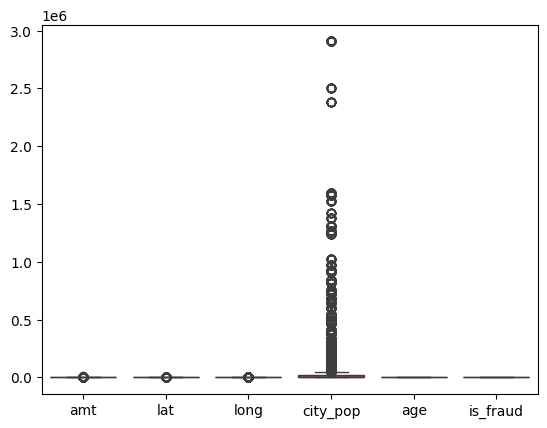

In [323]:
sns.boxplot(df_balanced[NUMERICAL_FEATURES])

<Axes: ylabel='amt'>

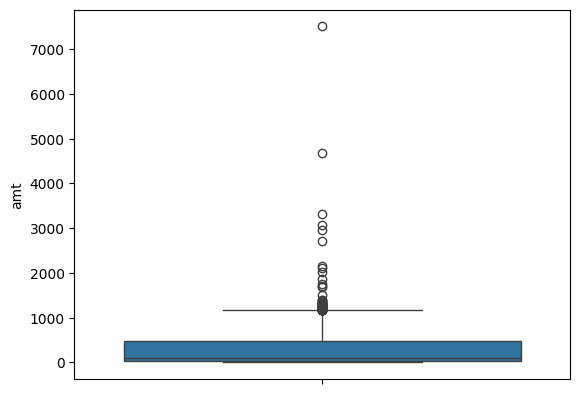

In [324]:
sns.boxplot(df_balanced['amt'])

In [325]:
# Not all of them are following gaussian norma distribution, using normal minmax scaler

#Using min max scaler
# Drop the scaler and
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [326]:
last_column = df_scaled.shape[1]-1

In [327]:
print(f"Not fraud: {len(df_scaled[df_scaled[last_column] == 0])}")
print(f"Fraud: {len(df_scaled[df_scaled[last_column] == 1])}")

Not fraud: 9651
Fraud: 9651


In [328]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.037304,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.001401,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.036672,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000803,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.036594,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [398]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,Night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36.0,1.0
2472,Night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64.0,1.0
2523,Night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64.0,1.0
2546,Night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36.0,1.0
2553,Night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64.0,1.0


## Modeling

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [400]:
# X = feature values, all teh columns except the last column
X = df_scaled.drop('is_fraud', axis=1)
# Y = target values, last column of the data frame
y = df_scaled['is_fraud']

In [401]:
# Splitting train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

In [402]:
# Training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [403]:
# Function to get the prediction and set the threshold

def predict(model, test_set, threshold):
  predictiions = model.predict(test_set)
  pred_threshold = model.predict_proba(test_set)
  test_set['prediction'] = predictiions
  test_set['prediction_prob'] = (pred_threshold >= threshold)[:, 1].astype(float)
  return test_set

In [404]:
# Use 0.4 aas threshold for LR
predict(model, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,prediction_prob
10529,0.0,0.923077,0.000032,0.230939,0.18,0.190112,0.863930,0.030520,0.209877,0.0,0.0
15361,0.5,0.153846,0.008027,0.717127,0.02,0.306858,0.797742,0.001980,0.654321,0.0,0.0
12160,0.0,0.769231,0.010819,0.818785,0.76,0.434610,0.914594,0.000275,0.283951,0.0,0.0
2953,1.0,0.384615,0.002729,0.709392,0.86,0.244708,0.635407,0.004378,0.222222,0.0,1.0
15870,0.0,0.000000,0.009766,0.477348,0.46,0.518806,0.720395,0.000511,0.148148,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17155,0.0,0.692308,0.000574,0.093923,0.42,0.514942,0.979377,0.001101,0.098765,0.0,0.0
17454,0.5,0.153846,0.006062,0.976796,0.48,0.358675,0.732927,0.000254,0.246914,0.0,0.0
12681,1.0,1.000000,0.001007,0.977901,0.20,0.232642,0.832440,0.001172,0.679012,0.0,0.0
15764,0.0,0.384615,0.000481,0.667403,0.08,0.380590,0.444976,0.131228,0.382716,0.0,0.0


The 'prediction' column is for standard threshold(0.5) and the pred_threshold stands for our results with changed threshold

In [405]:
y_test = pd.DataFrame(y_test)

In [406]:
x_test['real'] = y_test["is_fraud"]
x_test.head(5)

,0,1,2,3,4,5,6,7,8,prediction,prediction_prob,real
10529,0.0,0.923077,0.000032,0.230939,0.18,0.190112,0.863930,0.030520,0.209877,0.0,0.0,0.0
15361,0.5,0.153846,0.008027,0.717127,0.02,0.306858,0.797742,0.001980,0.654321,0.0,0.0,0.0
12160,0.0,0.769231,0.010819,0.818785,0.76,0.434610,0.914594,0.000275,0.283951,0.0,0.0,0.0
2953,1.0,0.384615,0.002729,0.709392,0.86,0.244708,0.635407,0.004378,0.222222,0.0,1.0,1.0
15870,0.0,0.000000,0.009766,0.477348,0.46,0.518806,0.720395,0.000511,0.148148,0.0,0.0,0.0


In [407]:
# With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      1932
         1.0       0.81      0.78      0.80      1929

    accuracy                           0.80      3861
   macro avg       0.80      0.80      0.80      3861
weighted avg       0.80      0.80      0.80      3861



In [408]:
# with 0.4 threshold
print(classification_report(x_test['real'], x_test['prediction_prob']))

              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      1932
         1.0       0.76      0.94      0.84      1929

    accuracy                           0.82      3861
   macro avg       0.84      0.82      0.82      3861
weighted avg       0.84      0.82      0.82      3861



In [409]:
# Lets define now a function to get the confusion matrix
def confusion_matrix_plot(test_set, pred_label, model):
  cm = confusion_matrix(test_set['real'], test_set[pred_label], labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()

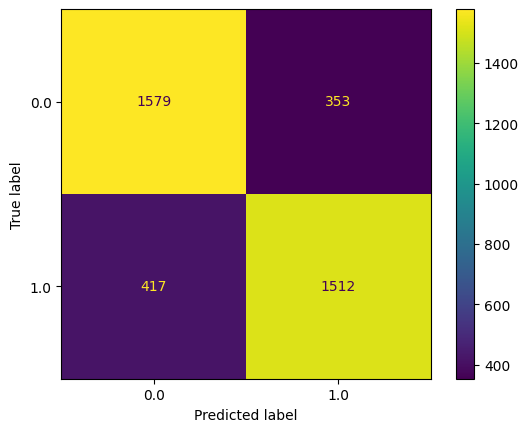

In [410]:
confusion_matrix_plot(x_test, 'prediction', model)

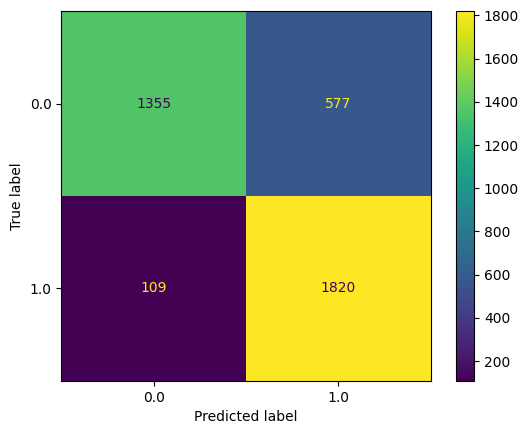

In [411]:
confusion_matrix_plot(x_test, 'prediction_prob', model)

In [412]:
# Lets define new function for ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
def roc_curve_plot(test_set, pred_label, model):
  fpr, tpr, thresholds = roc_curve(test_set['real'], test_set[pred_label])
  auc = roc_auc_score(test_set['real'], test_set[pred_label])
  plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

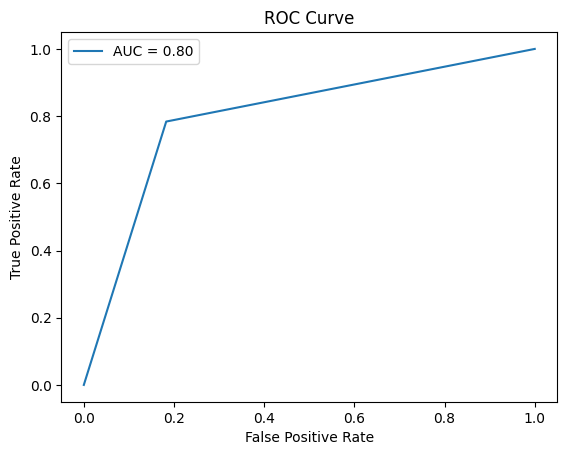

0.8005568005821573

In [343]:
roc_curve_plot(x_test, 'prediction', model)
roc_auc_score(x_test['real'], x_test['prediction'])

##XGBoost Model

In [413]:
from xgboost import XGBClassifier

In [414]:
# XGBoost classifier model
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [415]:
# Drop again our last prediction
X_test = x_test.drop(['prediction', 'prediction_prob', 'real'], axis=1)

In [416]:
# Experimenting 0.3 threshold for XGBoost model
predict(xgb, X_test, 0.3)

,0,1,2,3,4,5,6,7,8,prediction,prediction_prob
10529,0.0,0.923077,0.000032,0.230939,0.18,0.190112,0.863930,0.030520,0.209877,0,0.0
15361,0.5,0.153846,0.008027,0.717127,0.02,0.306858,0.797742,0.001980,0.654321,0,0.0
12160,0.0,0.769231,0.010819,0.818785,0.76,0.434610,0.914594,0.000275,0.283951,0,0.0
2953,1.0,0.384615,0.002729,0.709392,0.86,0.244708,0.635407,0.004378,0.222222,1,1.0
15870,0.0,0.000000,0.009766,0.477348,0.46,0.518806,0.720395,0.000511,0.148148,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17155,0.0,0.692308,0.000574,0.093923,0.42,0.514942,0.979377,0.001101,0.098765,0,0.0
17454,0.5,0.153846,0.006062,0.976796,0.48,0.358675,0.732927,0.000254,0.246914,0,0.0
12681,1.0,1.000000,0.001007,0.977901,0.20,0.232642,0.832440,0.001172,0.679012,1,1.0
15764,0.0,0.384615,0.000481,0.667403,0.08,0.380590,0.444976,0.131228,0.382716,0,0.0


In [417]:
x_test['real'] = y_test["is_fraud"]
print(classification_report(x_test['real'], x_test['prediction']))
print(classification_report(x_test['real'], x_test['prediction_prob']))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      1932
         1.0       0.81      0.78      0.80      1929

    accuracy                           0.80      3861
   macro avg       0.80      0.80      0.80      3861
weighted avg       0.80      0.80      0.80      3861

              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      1932
         1.0       0.76      0.94      0.84      1929

    accuracy                           0.82      3861
   macro avg       0.84      0.82      0.82      3861
weighted avg       0.84      0.82      0.82      3861



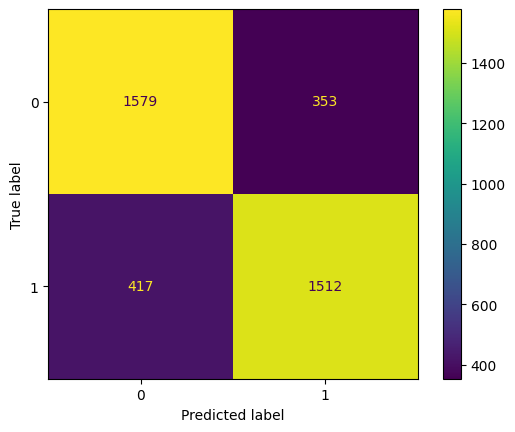

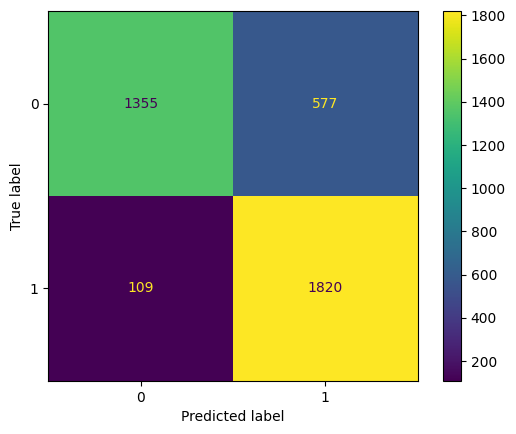

In [418]:
confusion_matrix_plot(x_test, 'prediction', xgb)
confusion_matrix_plot(x_test, 'prediction_prob', xgb)

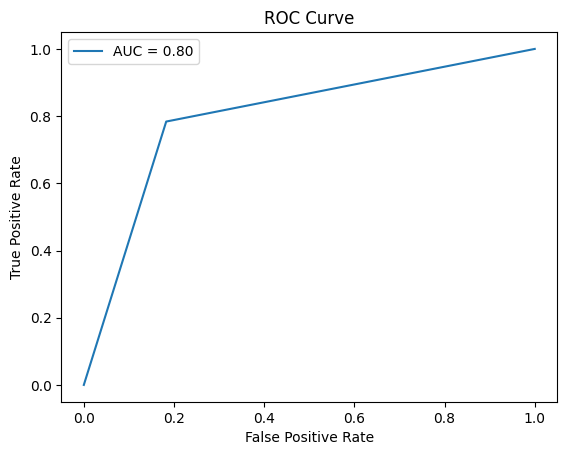

0.8005568005821573

In [419]:
roc_curve_plot(x_test, 'prediction', xgb)
roc_auc_score(x_test['real'], x_test['prediction'])

In [420]:
# Hyper parameter tuning for xgboost
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
#Define the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [352]:
#accuracy of xgb model after hyper parameter tuning
grid_search.best_score_

0.9746133279210705

In [421]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import xgboost as xgb

joblib.dump(grid_search, 'xgb_model_3.pkl')
# Create and fit preprocessing pipelines during the training
OneHotEncoder_encoder = OneHotEncoder()
#min_max_scaler = MinMaxScaler()

OneHotEncoder_encoder.fit(df_balanced[CATEGORICAL_FEATURES])
#min_max_scaler.fit(df_balanced[NUMERICAL_FEATURES])

# Save the preprocessing pipelines
joblib.dump(OneHotEncoder_encoder, 'OneHot_encoder_2.pkl')
#joblib.dump(min_max_scaler, 'min_max_scaler_2.pkl')



['OneHot_encoder_2.pkl']

In [263]:
# Import future importance
feature_importance = grid_search.best_estimator_.feature_importances_
keys = list(df_balanced.columns)
keys.remove('is_fraud')
feature_importance_df = pd.DataFrame({'Feature': keys, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)


            Feature  Importance
0  hour_transaction    0.446576
2               amt    0.331685
1          category    0.133393
8               age    0.027044
7          city_pop    0.015451
5               lat    0.012266
3              city    0.011716
6              long    0.010937
4             state    0.010932


In [279]:
#Load the encoder
import joblib
ordinal_encoder = joblib.load('ordinal_encoder_1.pkl')

print(ordinal_encoder.categories_)



[array([0., 1., 2.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133

In [357]:
# Initialize and fit encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_balanced[['hour_transaction', 'category', 'city', 'state']])
joblib.dump(encoder, 'OneHot_encoder_2.pkl')

['OneHot_encoder_2.pkl']

In [363]:
# Check the columns and their values before encoding
print(df_balanced[CATEGORICAL_FEATURES].head())
print(df_balanced[CATEGORICAL_FEATURES].shape)


      hour_transaction  category   city  state
2449               2.0       4.0  165.0   27.0
2472               2.0       2.0  733.0   43.0
2523               2.0       4.0  733.0   43.0
2546               2.0       2.0  165.0   27.0
2553               2.0       4.0  733.0   43.0
(19302, 4)


In [362]:
# After encoding
encoded_features = encoder.transform(df_balanced[CATEGORICAL_FEATURES])
print(encoded_features.shape)

(19302, 974)


In [423]:
# Save feature names
import pickle
feature_names = df_balanced.columns.tolist()
with open('feature_names.pkl', 'wb') as feature_file:
    pickle.dump(feature_names, feature_file)
